In [1]:
from dpm.models import PMF
from dpm.distributions import Data, Normal
from dpm.visualize import plot_stats
import numpy as np
import torch
N = 60
M = 50
D = 3



In [2]:
def build_toy_dataset(U, V, N, M, noise_std=0.1):
    R = np.dot(np.transpose(U), V) + np.random.normal(0, noise_std, size=(N, M))
    return R

In [3]:
U_true = np.random.randn(D, N)
V_true = np.random.randn(D, M)
V_true.shape

(3, 50)

In [4]:
R_true = np.stack([build_toy_dataset(U_true, V_true, N, M) for _ in range(1000)])
R_true.shape
R_true = torch.tensor(R_true).float()
R_true.shape

torch.Size([1000, 60, 50])

In [5]:
model = PMF(N, M, D)
model.U.shape, model.V.shape

(torch.Size([3, 60]), torch.Size([3, 50]))

In [6]:
model.sample(3)

tensor([[[ 0.3864,  0.0618, -0.5526,  ...,  1.6363, -0.7971, -0.9421],
         [-0.5244, -0.6330,  0.7331,  ...,  0.0066, -0.2852, -0.9150],
         [-2.2477,  0.9635, -2.7497,  ...,  0.3967, -1.2262, -0.6316],
         ...,
         [ 1.4413, -0.1523, -0.2828,  ...,  0.2619, -0.3119, -0.1791],
         [-1.7410, -0.8838,  0.7015,  ..., -1.4649,  0.9585, -1.0214],
         [-0.9756,  0.9575,  1.7558,  ...,  0.2504, -0.0841,  0.3843]],

        [[ 0.3503, -1.4146, -0.9161,  ..., -1.2408,  3.4266,  1.1365],
         [-0.9123, -0.7843,  1.1742,  ...,  0.6489, -0.0883, -0.2757],
         [ 0.6776, -2.0973,  1.1958,  ..., -0.3473, -1.2518, -0.2413],
         ...,
         [ 0.0319, -0.7184,  0.6228,  ...,  0.7964,  0.0059, -0.9628],
         [-0.2531,  0.5317,  0.5772,  ...,  0.5072, -1.0253, -0.6155],
         [-1.2977, -0.1704, -0.6360,  ..., -1.4910, -0.1815, -0.8069]],

        [[-1.7029,  0.6938,  0.4071,  ..., -0.2331, -1.1598, -1.7129],
         [ 0.0884,  0.9503, -1.3626,  ..., -0

In [7]:
model.reconstruct().shape

torch.Size([60, 50])

In [8]:
model.log_prob(R_true)

tensor([-7027.1045, -7047.5474, -7028.6265, -7024.4932, -7044.6143, -7037.6802,
        -7042.8062, -7023.6289, -7046.0161, -7041.5801, -7041.6890, -7035.0215,
        -7041.4746, -7029.5771, -7037.3916, -7040.2969, -7045.9546, -7025.2485,
        -7043.1997, -7037.6387, -7048.9106, -7020.2012, -7024.0854, -7038.0679,
        -7030.3247, -7038.5947, -7044.8608, -7052.8882, -7032.2134, -7038.6880,
        -7026.4058, -7043.8979, -7033.9336, -7040.6465, -7054.6167, -7040.7056,
        -7023.5215, -7040.3813, -7018.1655, -7039.7949, -7028.8081, -7029.9971,
        -7043.8394, -7051.2017, -7024.6602, -7042.6514, -7043.4399, -7048.4839,
        -7030.8076, -7054.9277, -7025.5718, -7029.3511, -7059.5195, -7018.4336,
        -7052.9248, -7040.9985, -7041.0078, -7043.1841, -7031.2280, -7024.3472,
        -7027.0190, -7043.1982, -7051.7314, -7030.1260, -7044.2197, -7045.5161,
        -7031.4199, -7029.6484, -7040.7139, -7049.8540, -7048.1182, -7026.0791,
        -7029.9429, -7021.1357, -7035.67

In [9]:
stats = model.fit(R_true, epochs=5000, lr=0.001)

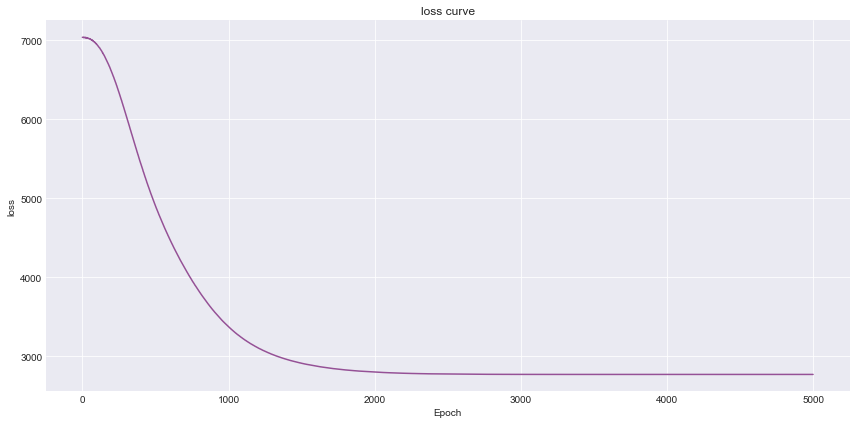

In [10]:
plot_stats(stats)

In [11]:
model.mse(R_true)

tensor(0.0100, grad_fn=<MeanBackward1>)

In [12]:
model.mae(R_true)

tensor(0.0798, grad_fn=<MeanBackward1>)

In [13]:
model.log_prob(R_true)

tensor([-2772.1079, -2771.6638, -2772.0945, -2772.0354, -2772.0166, -2771.4441,
        -2771.2429, -2772.0037, -2771.9163, -2771.3701, -2772.0327, -2771.6177,
        -2771.5977, -2772.0054, -2772.4866, -2772.4363, -2771.6101, -2771.9668,
        -2772.0203, -2771.5334, -2772.0017, -2771.4160, -2771.4902, -2771.9290,
        -2771.1877, -2771.4189, -2771.5288, -2772.8074, -2771.7419, -2772.1072,
        -2771.4731, -2771.9075, -2772.0149, -2772.1665, -2771.7112, -2771.9026,
        -2771.4729, -2771.9221, -2772.3171, -2771.8203, -2771.7212, -2771.5601,
        -2771.7227, -2772.4434, -2771.9895, -2772.6396, -2772.0271, -2771.8552,
        -2772.0645, -2771.7229, -2771.3062, -2772.3469, -2771.9324, -2771.5688,
        -2772.9573, -2771.5935, -2772.1655, -2772.4878, -2771.6162, -2771.3281,
        -2772.3115, -2772.2183, -2771.3230, -2771.6738, -2771.4104, -2771.8079,
        -2772.1982, -2771.6250, -2771.9639, -2771.7407, -2772.1042, -2771.6021,
        -2771.6431, -2771.9194, -2771.50

In [14]:
R_true

tensor([[[ 3.8461e-01,  1.3123e+00,  6.7455e-01,  ...,  8.8877e-01,
           9.3703e-01, -2.3490e+00],
         [ 5.2638e+00, -2.8291e+00,  4.1184e+00,  ...,  9.4558e-01,
          -2.0764e+00, -3.7274e-01],
         [-1.1525e+00,  6.1309e-01, -9.9936e-02,  ..., -1.5028e-01,
          -2.0258e-01,  3.6471e-01],
         ...,
         [ 9.1432e-01, -1.1295e+00,  1.5514e-01,  ..., -1.3581e-01,
          -3.0105e-01,  4.7374e-01],
         [-2.4378e+00,  1.8740e+00, -9.1971e-01,  ..., -2.1471e-01,
           5.4270e-01, -5.6854e-02],
         [-8.7742e-02, -1.5338e-01,  2.3800e-01,  ..., -7.4141e-02,
          -3.0831e-01,  6.9716e-01]],

        [[ 5.1999e-01,  1.3434e+00,  6.8580e-01,  ...,  9.2335e-01,
           8.8713e-01, -2.2926e+00],
         [ 5.3317e+00, -2.7824e+00,  4.0430e+00,  ...,  1.1659e+00,
          -2.1040e+00, -1.9134e-01],
         [-1.3870e+00,  5.3792e-01, -2.6788e-01,  ..., -2.4141e-01,
          -3.3316e-01,  5.7105e-01],
         ...,
         [ 1.1291e+00, -8

In [15]:
model.reconstruct()

tensor([[ 0.4299,  1.4193,  0.6618,  ...,  0.9190,  0.8914, -2.3908],
        [ 5.3516, -2.7792,  4.0103,  ...,  1.1750, -2.0171, -0.3743],
        [-1.2266,  0.5147, -0.2815,  ..., -0.2336, -0.1101,  0.5527],
        ...,
        [ 0.9304, -0.9763,  0.2288,  ..., -0.0969, -0.3938,  0.4826],
        [-2.5012,  1.8027, -0.8396,  ..., -0.1600,  0.5725, -0.1404],
        [-0.0353, -0.3240,  0.2731,  ..., -0.1254, -0.4822,  0.6571]],
       grad_fn=<MmBackward>)

In [16]:
# model.U